## Binary Classification using Keras - cancer-classification


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [61]:
df = pd.read_csv("cancer-classification.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [64]:
df = df.drop("Unnamed: 32", axis=1)
df = df.drop("id", axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [51]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [65]:
def to_num(char):
    if char=="M":
        return 1
    else:
        return 0


df["diagnosis"]=df["diagnosis"].apply(to_num)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Plotting

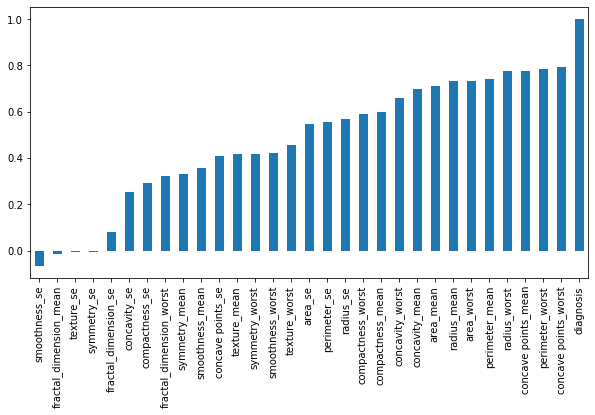

In [69]:
plt.figure(figsize=(10,5))
df.corr()["diagnosis"].sort_values().plot(kind="bar")

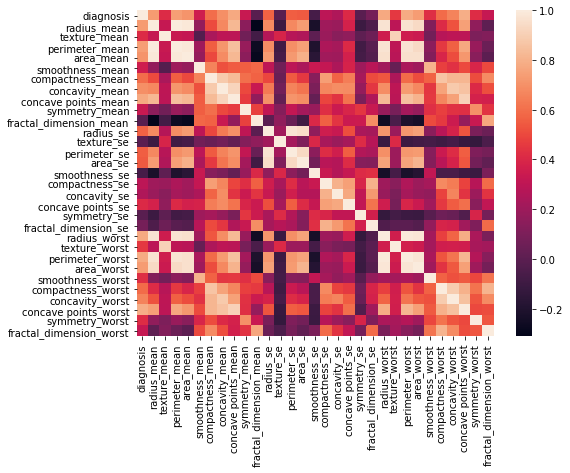

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())
plt.show()

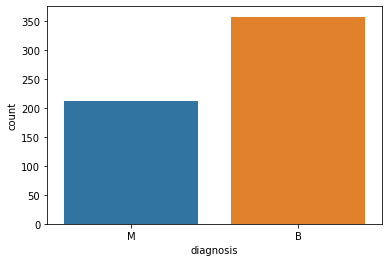

In [62]:
sns.countplot(data=df, x="diagnosis")
plt.show()

In [60]:
df["diagnosis"].sum()

212

#   

## Data Preprocessing

In [81]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df.drop("diagnosis", axis=1).values
y = df["diagnosis"].values

X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [82]:
# Scaling Data
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#   

## DL Model

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(29, activation="relu"))
model.add(Dense(15, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [88]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/400
426/426 [==============================] - 1s 3ms/sample - loss: 0.7190 - val_loss: 0.6844
Epoch 2/400
426/426 [==============================] - 0s 320us/sample - loss: 0.6659 - val_loss: 0.6492
Epoch 3/400
426/426 [==============================] - 0s 105us/sample - loss: 0.6384 - val_loss: 0.6293
Epoch 4/400
426/426 [==============================] - 0s 111us/sample - loss: 0.6175 - val_loss: 0.6075
Epoch 5/400
426/426 [==============================] - 0s 108us/sample - loss: 0.5936 - val_loss: 0.5810
Epoch 6/400
426/426 [==============================] - 0s 102us/sample - loss: 0.5667 - val_loss: 0.5506
Epoch 7/400
426/426 [==============================] - 0s 105us/sample - loss: 0.5356 - val_loss: 0.5169
Epoch 8/400
426/426 [==============================] - 0s 103us/sample - loss: 0.5010 - val_loss: 0.4794
Epoch 9/400
426/426 [==============================] - 0s 108us/sample - loss: 0.4633 - val_loss: 0.4405
Epoch 10/40

426/426 [==============================] - 0s 105us/sample - loss: 0.0746 - val_loss: 0.1041
Epoch 79/400
426/426 [==============================] - 0s 108us/sample - loss: 0.0735 - val_loss: 0.1071
Epoch 80/400
426/426 [==============================] - 0s 94us/sample - loss: 0.0743 - val_loss: 0.1054
Epoch 81/400
426/426 [==============================] - 0s 98us/sample - loss: 0.0731 - val_loss: 0.1021
Epoch 82/400
426/426 [==============================] - 0s 99us/sample - loss: 0.0719 - val_loss: 0.1057
Epoch 83/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0720 - val_loss: 0.1031
Epoch 84/400
426/426 [==============================] - 0s 94us/sample - loss: 0.0729 - val_loss: 0.1064
Epoch 85/400
426/426 [==============================] - 0s 98us/sample - loss: 0.0717 - val_loss: 0.1079
Epoch 86/400
426/426 [==============================] - 0s 95us/sample - loss: 0.0764 - val_loss: 0.1050
Epoch 87/400
426/426 [==============================] - 0s 106us/s

426/426 [==============================] - 0s 108us/sample - loss: 0.0638 - val_loss: 0.1177
Epoch 156/400
426/426 [==============================] - 0s 101us/sample - loss: 0.0575 - val_loss: 0.1165
Epoch 157/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0570 - val_loss: 0.1206
Epoch 158/400
426/426 [==============================] - 0s 89us/sample - loss: 0.0583 - val_loss: 0.1174
Epoch 159/400
426/426 [==============================] - 0s 87us/sample - loss: 0.0640 - val_loss: 0.1145
Epoch 160/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0572 - val_loss: 0.1188
Epoch 161/400
426/426 [==============================] - 0s 89us/sample - loss: 0.0556 - val_loss: 0.1207
Epoch 162/400
426/426 [==============================] - 0s 87us/sample - loss: 0.0560 - val_loss: 0.1210
Epoch 163/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0574 - val_loss: 0.1174
Epoch 164/400
426/426 [==============================] - 0

426/426 [==============================] - 0s 124us/sample - loss: 0.0517 - val_loss: 0.1268
Epoch 233/400
426/426 [==============================] - 0s 101us/sample - loss: 0.0517 - val_loss: 0.1323
Epoch 234/400
426/426 [==============================] - 0s 89us/sample - loss: 0.0531 - val_loss: 0.1291
Epoch 235/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0692 - val_loss: 0.1293
Epoch 236/400
426/426 [==============================] - 0s 94us/sample - loss: 0.0533 - val_loss: 0.1247
Epoch 237/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0523 - val_loss: 0.1359
Epoch 238/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0507 - val_loss: 0.1234
Epoch 239/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0529 - val_loss: 0.1290
Epoch 240/400
426/426 [==============================] - 0s 98us/sample - loss: 0.0505 - val_loss: 0.1272
Epoch 241/400
426/426 [==============================] - 0

426/426 [==============================] - 0s 94us/sample - loss: 0.0483 - val_loss: 0.1413
Epoch 310/400
426/426 [==============================] - 0s 89us/sample - loss: 0.0484 - val_loss: 0.1366
Epoch 311/400
426/426 [==============================] - 0s 96us/sample - loss: 0.0528 - val_loss: 0.1392
Epoch 312/400
426/426 [==============================] - 0s 96us/sample - loss: 0.0520 - val_loss: 0.1381
Epoch 313/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0507 - val_loss: 0.1448
Epoch 314/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0486 - val_loss: 0.1295
Epoch 315/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0472 - val_loss: 0.1464
Epoch 316/400
426/426 [==============================] - 0s 94us/sample - loss: 0.0496 - val_loss: 0.1351
Epoch 317/400
426/426 [==============================] - 0s 89us/sample - loss: 0.0483 - val_loss: 0.1379
Epoch 318/400
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 96us/sample - loss: 0.0470 - val_loss: 0.1489
Epoch 387/400
426/426 [==============================] - 0s 98us/sample - loss: 0.0462 - val_loss: 0.1489
Epoch 388/400
426/426 [==============================] - 0s 103us/sample - loss: 0.0465 - val_loss: 0.1497
Epoch 389/400
426/426 [==============================] - 0s 98us/sample - loss: 0.0450 - val_loss: 0.1482
Epoch 390/400
426/426 [==============================] - 0s 98us/sample - loss: 0.0451 - val_loss: 0.1520
Epoch 391/400
426/426 [==============================] - 0s 103us/sample - loss: 0.0468 - val_loss: 0.1496
Epoch 392/400
426/426 [==============================] - 0s 99us/sample - loss: 0.0524 - val_loss: 0.1404
Epoch 393/400
426/426 [==============================] - 0s 98us/sample - loss: 0.0495 - val_loss: 0.1541
Epoch 394/400
426/426 [==============================] - 0s 94us/sample - loss: 0.0476 - val_loss: 0.1543
Epoch 395/400
426/426 [==============================] - 0

In [90]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.719026,0.684440
1,0.665893,0.649201
2,0.638437,0.629303
3,0.617542,0.607484
4,0.593571,0.580990


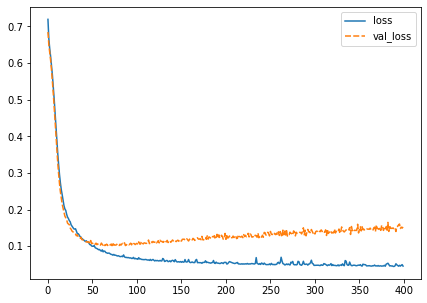

In [97]:
plt.figure(figsize=(7,5))
sns.lineplot(data=losses)
plt.show()

### Early stopping to prevent over-fitting

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(29, activation="relu"))
model.add(Dense(15, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=25,verbose=1)

In [108]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/400
426/426 [==============================] - 1s 2ms/sample - loss: 0.7083 - val_loss: 0.6920
Epoch 2/400
426/426 [==============================] - 0s 108us/sample - loss: 0.6774 - val_loss: 0.6716
Epoch 3/400
426/426 [==============================] - 0s 105us/sample - loss: 0.6594 - val_loss: 0.6556
Epoch 4/400
426/426 [==============================] - 0s 102us/sample - loss: 0.6424 - val_loss: 0.6358
Epoch 5/400
426/426 [==============================] - 0s 110us/sample - loss: 0.6227 - val_loss: 0.6155
Epoch 6/400
426/426 [==============================] - 0s 105us/sample - loss: 0.5999 - val_loss: 0.5888
Epoch 7/400
426/426 [==============================] - 0s 91us/sample - loss: 0.5747 - val_loss: 0.5641
Epoch 8/400
426/426 [==============================] - 0s 103us/sample - loss: 0.5461 - val_loss: 0.5333
Epoch 9/400
426/426 [==============================] - 0s 104us/sample - loss: 0.5194 - val_loss: 0.5085
Epoch 10/400

426/426 [==============================] - 0s 116us/sample - loss: 0.0766 - val_loss: 0.1025
Epoch 79/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0785 - val_loss: 0.1040
Epoch 80/400
426/426 [==============================] - 0s 96us/sample - loss: 0.0755 - val_loss: 0.1059
Epoch 81/400
426/426 [==============================] - 0s 93us/sample - loss: 0.0759 - val_loss: 0.1090
Epoch 82/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0751 - val_loss: 0.1043
Epoch 83/400
426/426 [==============================] - 0s 94us/sample - loss: 0.0744 - val_loss: 0.1100
Epoch 84/400
426/426 [==============================] - 0s 94us/sample - loss: 0.0751 - val_loss: 0.1041
Epoch 85/400
426/426 [==============================] - 0s 96us/sample - loss: 0.0738 - val_loss: 0.1041
Epoch 86/400
426/426 [==============================] - 0s 94us/sample - loss: 0.0742 - val_loss: 0.1073
Epoch 87/400
426/426 [==============================] - 0s 91us/sam

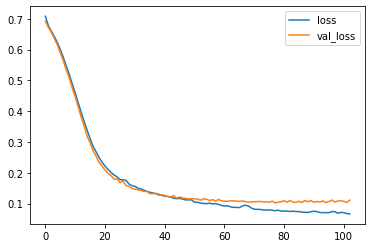

In [109]:
losses = pd.DataFrame(model.history.history)
losses.head()
losses.plot()

### Adding dropout layers

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(29, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [111]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/400
426/426 [==============================] - 1s 1ms/sample - loss: 0.7374 - val_loss: 0.6758
Epoch 2/400
426/426 [==============================] - 0s 110us/sample - loss: 0.6848 - val_loss: 0.6598
Epoch 3/400
426/426 [==============================] - 0s 117us/sample - loss: 0.6626 - val_loss: 0.6374
Epoch 4/400
426/426 [==============================] - 0s 105us/sample - loss: 0.6642 - val_loss: 0.6228
Epoch 5/400
426/426 [==============================] - 0s 108us/sample - loss: 0.6324 - val_loss: 0.6005
Epoch 6/400
426/426 [==============================] - 0s 115us/sample - loss: 0.6240 - val_loss: 0.5819
Epoch 7/400
426/426 [==============================] - 0s 108us/sample - loss: 0.6025 - val_loss: 0.5652
Epoch 8/400
426/426 [==============================] - 0s 109us/sample - loss: 0.5784 - val_loss: 0.5415
Epoch 9/400
426/426 [==============================] - 0s 108us/sample - loss: 0.5716 - val_loss: 0.5160
Epoch 10/40

426/426 [==============================] - 0s 122us/sample - loss: 0.1432 - val_loss: 0.1018
Epoch 78/400
426/426 [==============================] - 0s 124us/sample - loss: 0.1714 - val_loss: 0.0964
Epoch 79/400
426/426 [==============================] - 0s 120us/sample - loss: 0.1417 - val_loss: 0.1045
Epoch 80/400
426/426 [==============================] - 0s 119us/sample - loss: 0.1413 - val_loss: 0.0976
Epoch 81/400
426/426 [==============================] - 0s 121us/sample - loss: 0.1432 - val_loss: 0.0976
Epoch 82/400
426/426 [==============================] - 0s 119us/sample - loss: 0.1514 - val_loss: 0.0962
Epoch 83/400
426/426 [==============================] - 0s 110us/sample - loss: 0.1492 - val_loss: 0.0976
Epoch 84/400
426/426 [==============================] - 0s 113us/sample - loss: 0.1135 - val_loss: 0.1083
Epoch 85/400
426/426 [==============================] - 0s 115us/sample - loss: 0.1497 - val_loss: 0.0972
Epoch 86/400
426/426 [==============================] - 0s 

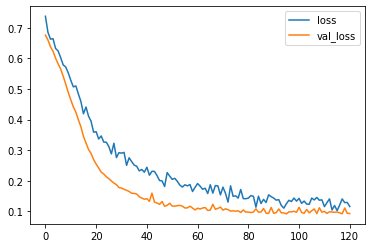

In [112]:
losses = pd.DataFrame(model.history.history)
losses.head()
losses.plot()

#   

## Model Evaluation

In [119]:
predictions = model.predict_classes(X_test)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.96      0.98      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



Confusion Matrix 
 [[86  2]
 [ 1 54]]


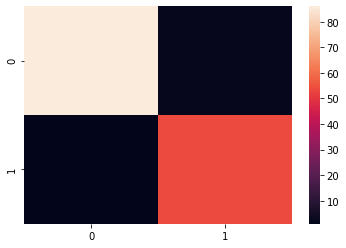

In [124]:
print("Confusion Matrix \n",confusion_matrix(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions))
plt.show()